# Extract, Transform, Load
### Data Frames and Higher Level Methods for ETL
JP Sabini APAN Spring 2018


### Learning Objectives

    
    Manipulate Pandas DataFrames and Series.
    Filter and sort data using Pandas.
    Manipulate DataFrame columns.
    Know how to handle null and missing values.
    Merge,Join,concat
    Groupby and aggr method
    Binning pd.cut
    Some plots.
    



## Lesson Guide

- [What Is Pandas?](#pandas)
   
- [Renaming, Adding, and Removing Columns](#columns)

- [Handling Missing Values](#The Art of Handeling Missing Data)
- [Filtering Out NA]

- [Split-Apply-Combine](#split-apply-combine)
- [Joining (Merging) Concat DataFrames](#joining-dataframes)
- [Assignment on Merge]
- [Groupby objects and agg]
- [Binning, cut ,qcut]

- [OPTIONAL: Other Commonly Used Features](#other-features)

- (#summary)

<a id="pandas"></a>

## What Is Pandas ? We know already a lot. 

- **Objective:** Define what Pandas is and how it relates to data science.

Pandas is a Python library that primarily adds two new datatypes to Python: `DataFrame` and `Series`.

- A `Series` is a sequence of items, where each item has a unique label (called an `index`).
- A `DataFrame` is a table of data. Each row has a unique label (the `row index`), and each column has a unique label (the `column index`).
- Note that each column in a `DataFrame` can be considered a `Series` (`Series` index).

> Behind the scenes, these datatypes use the NumPy ("Numerical Python") library. NumPy primarily adds the `ndarray` (n-dimensional array) datatype to Pandas. An `ndarray` is similar to a Python list — it stores ordered data. However, it differs in three respects:
> - Each element has the same datatype (typically fixed-size, e.g., a 32-bit integer).
> - Elements are stored contiguously (immediately after each other) in memory for fast retrieval.
> - The total size of an `ndarray` is fixed.

> Storing `Series` and `DataFrame` data in `ndarray`s makes Pandas faster and uses less memory than standard Python datatypes. Many libraries (such as scikit-learn) accept `ndarray`s as input rather than Pandas datatypes, so we will frequently convert between them.


### Using Pandas

Pandas is frequently used in data science because it offers a large set of commonly used functions, is relatively fast, and has a large community. Because many data science libraries also use NumPy to manipulate data, you can easily transfer data between libraries (as we will often do in this class!).

Pandas is a large library that typically takes a lot of practice to learn. It heavily overrides Python operators, resulting in odd-looking syntax. For example, given a `DataFrame` called `cars` which contains a column `mpg`, we might want to view all cars with mpg over 35. To do this, we might write: `cars[cars['mpg'] > 35]`. 

Do not be discouraged if Pandas feels overwhelming. Gradually, as you use it, you will become familiar with which methods to use and the "Pandas way" of thinking about and manipulating data.

#### Viewing Documentation

There are a few ways to find more information about a method.

Method 1: In Jupyter, you can quickly view documentation for a method by following the method name by a ?, as follows:

users.head?

    Signature: users.head(n=5)
    Docstring: Returns first n rows

Notice that we would normally invoke this method by calling users.head(5). One quirk of IPython is that the ? symbol must be the last character in the cell. Otherwise, it might not work.

    The ? is a shortcut for the built-in Python function help, which returns the method's docstring. For example:

    help(users.head)

Method 2: You can also search online for the phrase "DataFrame head", since you are calling the method head on the users object, which happens to be a DataFrame. (type(users) => pandas.DataFrame)

You can alternatively search online for pandas head, but be careful! DataFrame and Series both have a head method, so make sure you view the documentation for the correct one since they might be called differently. You will know you are looking at the correct documentation page because it will say DataFrame.head at the top, instead of Series.head

** As always, it is important to keep abreast of changes.

- https://pandas.pydata.org/

- https://pandas.pydata.org/pandas-docs/stable/




In [1]:
!python --version

Python 3.6.3 :: Anaconda custom (64-bit)


In [3]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

## The Art of Handling Missing Data
By “missing” we simply mean NA (“not available”) or “not present for whatever reason”. Many data sets simply arrive with missing data, either because it exists and was not collected or it never existed. For example, in a collection of financial time series, some of the time series might start on different dates. Thus, values prior to the start date would generally be marked as missing.

In pandas, one of the most common ways that missing data is introduced into a data set is by reindexing. 
Here is a way to think about na's.

- Count how many NA,or Nans What percentage of the data row columns ?
- Decide if data is recoverable or not
- if yes, get new data to update or augment frame 
- if no, then you may have to average or fill in or use sampling
- You may need to impute the data. Refer to Mice package in R. Use R then save R's df then read into Pandas.
- If the NA's are approx 1 -5 % of Total data then you might be able to remove. If the data id OBVIOUSLY WRONG like negative prices for example when it is not expected remove the rows or change the data items appropriately.

Warning

One has to be mindful that in python (and numpy), the nan's don’t compare equal, but None's do. Note that Pandas/numpy uses the fact that np.nan != np.nan, and treats None like np.nan.

In [11]: None == None <br>
Out[11]: True <br>

In [12]: np.nan == np.nan <br>
Out[12]: False<br>





# Lets begin 
### 1st. We review isnull, the number of NA's in a df,  notnull, dropna,drop columns and rows.

In [4]:
oz_df = pd.read_csv(r'C:/Users/jpsabini/Columbia2018/PythonClassCode/ozone.csv')
print(oz_df.head())
oz_df.info()

   Ozone  Solar.R  Wind  Temp  Month  Day
0   41.0    190.0   7.4    67      5    1
1   36.0    118.0   8.0    72      5    2
2   12.0    149.0  12.6    74      5    3
3   18.0    313.0  11.5    62      5    4
4    NaN      NaN  14.3    56      5    5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
Ozone      116 non-null float64
Solar.R    146 non-null float64
Wind       153 non-null float64
Temp       153 non-null int64
Month      153 non-null int64
Day        153 non-null int64
dtypes: float64(3), int64(3)
memory usage: 7.2 KB


In [5]:
oz_df.isnull().sum()
# Ozone has 37 Na's 
oz_df.isnull().sum()/len(oz_df) # fraction of na's

Ozone      0.241830
Solar.R    0.045752
Wind       0.000000
Temp       0.000000
Month      0.000000
Day        0.000000
dtype: float64

In [6]:
# None is treated like NA
oz_df.loc[4,'Temp'] =None # we'll assign a None 
print(oz_df.loc[3:5,:])
oz_df.isnull().sum()

   Ozone  Solar.R  Wind  Temp  Month  Day
3   18.0    313.0  11.5  62.0      5    4
4    NaN      NaN  14.3   NaN      5    5
5   28.0      NaN  14.9  66.0      5    6


Ozone      37
Solar.R     7
Wind        0
Temp        1
Month       0
Day         0
dtype: int64

In [7]:
# Here we use mask to see the 37  rows of missing data
mask=oz_df.loc[:,'Ozone':'Day'].isnull()
Mask_ozone=mask.loc[:,'Ozone':'Temp']
#Mask_ozone.head(10)
oz_df[Mask_ozone.iloc[:,0]]
#all of the Nan's locations in the dataset

,Ozone,Solar.R,Wind,Temp,Month,Day
4,NaN,NaN,14.3,NaN,5,5
9,NaN,194.0,8.6,69.0,5,10
24,NaN,66.0,16.6,57.0,5,25
25,NaN,266.0,14.9,58.0,5,26
26,NaN,NaN,8.0,57.0,5,27
31,NaN,286.0,8.6,78.0,6,1
32,NaN,287.0,9.7,74.0,6,2
33,NaN,242.0,16.1,67.0,6,3
34,NaN,186.0,9.2,84.0,6,4
35,NaN,220.0,8.6,85.0,6,5


In [8]:
oz_df.describe(percentiles=[.25, .5, .75])
#stats there are more methods in stats look them up. std(), Cov(),Corr()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,116.000000,146.000000,153.000000,152.000000,153.000000,153.000000
mean,42.129310,185.931507,9.957516,78.026316,6.993464,15.803922
std,32.987885,90.058422,3.523001,9.326987,1.416522,8.864520
min,1.000000,7.000000,1.700000,57.000000,5.000000,1.000000
25%,18.000000,115.750000,7.400000,72.750000,6.000000,8.000000
50%,31.500000,205.000000,9.700000,79.000000,7.000000,16.000000
75%,63.250000,258.750000,11.500000,85.000000,8.000000,23.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


In [ ]:
# all ways of looking at a df

### Filtering Out Missing Data

In [10]:
oz_df.head(10) # the original

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67.0,5,1
1,36.0,118.0,8.0,72.0,5,2
2,12.0,149.0,12.6,74.0,5,3
3,18.0,313.0,11.5,62.0,5,4
4,NaN,NaN,14.3,NaN,5,5
5,28.0,NaN,14.9,66.0,5,6
6,23.0,299.0,8.6,65.0,5,7
7,19.0,99.0,13.8,59.0,5,8
8,8.0,19.0,20.1,61.0,5,9
9,NaN,194.0,8.6,69.0,5,10


### Remove Columns or Rows  default (axis=0)  the columns is denoted by axis=1 . The dropna() method

In [13]:
# dropna() method will drop all rows(default)/columns(axis=1) that 
# contain an Na or Nan
cleaned=oz_df.dropna(axis=0,inplace=False)
#we could change the axis to 1 please try it
print(cleaned.notnull().sum())
cleaned.head(10)
# rows are dropped

Ozone      111
Solar.R    111
Wind       111
Temp       111
Month      111
Day        111
dtype: int64


,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67.0,5,1
1,36.0,118.0,8.0,72.0,5,2
2,12.0,149.0,12.6,74.0,5,3
3,18.0,313.0,11.5,62.0,5,4
6,23.0,299.0,8.6,65.0,5,7
7,19.0,99.0,13.8,59.0,5,8
8,8.0,19.0,20.1,61.0,5,9
11,16.0,256.0,9.7,69.0,5,12
12,11.0,290.0,9.2,66.0,5,13
13,14.0,274.0,10.9,68.0,5,14


#### Columns or Rows using Drop() method

#### Axis=1 acts on columns 

In [14]:
oz_df.drop(labels=['Solar.R','Wind'],axis=1,inplace=False).head()
#drops 'Solar.R','Wind' columns with nan 

,Ozone,Temp,Month,Day
0,41.0,67.0,5,1
1,36.0,72.0,5,2
2,12.0,74.0,5,3
3,18.0,62.0,5,4
4,NaN,NaN,5,5


### Drop rows axis=0 (default)

In [15]:
#This will drop first  5 rows.regardless of nan
cleaned=oz_df.drop(np.arange(0,5),axis=0,inplace=False)
print(cleaned.info())
cleaned.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 5 to 152
Data columns (total 6 columns):
Ozone      112 non-null float64
Solar.R    142 non-null float64
Wind       148 non-null float64
Temp       148 non-null float64
Month      148 non-null int64
Day        148 non-null int64
dtypes: float64(4), int64(2)
memory usage: 8.1 KB
None


,Ozone,Solar.R,Wind,Temp,Month,Day
5,28.0,NaN,14.9,66.0,5,6
6,23.0,299.0,8.6,65.0,5,7
7,19.0,99.0,13.8,59.0,5,8
8,8.0,19.0,20.1,61.0,5,9
9,NaN,194.0,8.6,69.0,5,10
10,7.0,NaN,6.9,74.0,5,11
11,16.0,256.0,9.7,69.0,5,12
12,11.0,290.0,9.2,66.0,5,13
13,14.0,274.0,10.9,68.0,5,14
14,18.0,65.0,13.2,58.0,5,15


###  Examples of methods with smaller datasets follow so we can see details rather than tweaking Ozone which is large.

In [16]:
# To reiterate, this shows that Na is converted to NAN as we saw this above.
from numpy import nan as NA
data = pd.Series([1, NA, 3.5, None, 7])
print(data) 
data.dropna()

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64


0    1.0
2    3.5
4    7.0
dtype: float64

In [17]:
data.notnull()#we saw this last time

0     True
1    False
2     True
3    False
4     True
dtype: bool

In [18]:
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],
                     [NA, NA, NA], [NA, 6.5, 3.]])
data




,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [19]:
clean = data.dropna()# the default is drop rows that have any NA
clean

,0,1,2
0,1.0,6.5,3.0


In [20]:
data.dropna(how='all',axis=0)
# When the rows or columns contain all Na's

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [21]:
data.dropna(how='any')
# When the rows or columns contain ANY Na's

,0,1,2
0,1.0,6.5,3.0


In [22]:
data[4] = NA # assign Na to column 4
data


,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [23]:
data.dropna(axis=0,how='all') #try axis =1 we got rid of row 2

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [ ]:
data.dropna(axis=0,how='all') #try axis =1 we got rid of row 2

### Filling In Missing Data

In [ ]:
#df = pd.DataFrame(np.random.randn(6, 3)) #Try this yourselves.
#df.iloc[2:, 1] = NA
#df.iloc[4:, 2] = NA
#df
#df.fillna(method='ffill')
#df.fillna(method='ffill', limit=2)

In [24]:
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [25]:
data.fillna(0)

,0,1,2,4
0,1.0,6.5,3.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,6.5,3.0,0.0


In [32]:
# fill na's with prespecified values. You can't use dicts for columns alas
data.fillna({1: 0.5, 2: 100})

,0,1,2,4
0,1.0,6.5,3.0,2.0
1,1.0,0.5,100.0,3.0
2,NaN,0.5,100.0,7.0
3,NaN,6.5,3.0,NaN


In [33]:
data[4]=[2,3,7,np.nan]
data

,0,1,2,4
0,1.0,6.5,3.0,2.0
1,1.0,NaN,NaN,3.0
2,NaN,NaN,NaN,7.0
3,NaN,6.5,3.0,NaN


In [34]:
data.fillna(value=data.mean()) #mean of non na's in column


,0,1,2,4
0,1.0,6.5,3.0,2.0
1,1.0,6.5,3.0,3.0
2,1.0,6.5,3.0,7.0
3,1.0,6.5,3.0,4.0


In [35]:
#INPLACE REMEBER WE DID THIS MANY TIMES>
data.fillna(0, inplace=True)
data

,0,1,2,4
0,1.0,6.5,3.0,2.0
1,1.0,0.0,0.0,3.0
2,0.0,0.0,0.0,7.0
3,0.0,6.5,3.0,0.0


## Data Transformation
Pandas highly favors certain patterns of use. For example, looping through a `DataFrame` row by row is highly discouraged. Instead, Pandas favors using **vectorized functions** that operate column by column. (This is because each column is stored separately as an `ndarray`, and NumPy is optimized for operating on `ndarray`s.)

Review the "map" and when that is used usu with a function with a SERIES . Your defined function can also be a lambda as we saw. 



### Removing Duplicates

In [39]:
#Let's create a df with dups along rows  6 is a duplicate
data = pd.DataFrame({'k1': [1, 2] * 3 + [2],
                     'k2': [1, 1, 2, 3, 3, 4, 4]})
data
#The last one is a duplicated rows

,k1,k2
0,1,1
1,2,1
2,1,2
3,2,3
4,1,3
5,2,4
6,2,4


In [38]:
data.duplicated()
# a series is returned.

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [41]:
data.k2.nunique()

4

In [42]:
data.k1.nunique()

2

In [48]:
data['k1'].unique()

array([1, 2], dtype=int64)

In [49]:
data.drop_duplicates()

,k1,k2
0,1,1
1,2,1
2,1,2
3,2,3
4,1,3
5,2,4


In [50]:
data['v1'] = range(7) # "add" a new column with 7 items
data
#data.drop_duplicates(['k1'])

,k1,k2,v1
0,1,1,0
1,2,1,1
2,1,2,2
3,2,3,3
4,1,3,4
5,2,4,5
6,2,4,6


In [51]:
data.drop_duplicates(['k1'])

,k1,k2,v1
0,1,1,0
1,2,1,1


In [52]:
data['v1'] = [1,2,1,2,1,2,2]
data

,k1,k2,v1
0,1,1,1
1,2,1,2
2,1,2,1
3,2,3,2
4,1,3,1
5,2,4,2
6,2,4,2


In [53]:
data.T    #detect duplicate as columns

,0,1,2,3,4,5,6
k1,1,2,1,2,1,2,2
k2,1,1,2,3,3,4,4
v1,1,2,1,2,1,2,2


In [54]:
data.T.drop_duplicates()

,0,1,2,3,4,5,6
k1,1,2,1,2,1,2,2
k2,1,1,2,3,3,4,4


### Transforming Data Using a Function or Mapping

In [55]:
data = pd.DataFrame({'food': [u'红烧肉', 'Pulled Pork', 'bacon',
                              'Pastrami', 'corned beef', 'Bacon',
                              'pastrami', 'honey ham', 'Nova lox'],
                     'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,红烧肉,4.0
1,Pulled Pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,Nova lox,6.0


In [56]:
# The transformation using a dict as a map
meat_to_animal = {
  'bacon': 'pig',
  'pulled pork': 'pig',
  'pastrami': 'cow',
  'corned beef': 'cow',
  'honey ham': 'pig',
  'nova lox': 'salmon',
  u'红烧肉':u'piggy'
}

In [57]:
lowercased = data['food'].str.lower()
print(lowercased)
data['animal'] = lowercased.map(meat_to_animal)
data

0            红烧肉
1    pulled pork
2          bacon
3       pastrami
4    corned beef
5          bacon
6       pastrami
7      honey ham
8       nova lox
Name: food, dtype: object


,food,ounces,animal
0,红烧肉,4.0,piggy
1,Pulled Pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,Nova lox,6.0,salmon


In [58]:
data['food'].map(lambda x: meat_to_animal[x.lower()])

0     piggy
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

### Using Apply to transform data efficiently ( Don't use loops on DF)

In [59]:
oz_df

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67.0,5,1
1,36.0,118.0,8.0,72.0,5,2
2,12.0,149.0,12.6,74.0,5,3
3,18.0,313.0,11.5,62.0,5,4
4,NaN,NaN,14.3,NaN,5,5
5,28.0,NaN,14.9,66.0,5,6
6,23.0,299.0,8.6,65.0,5,7
7,19.0,99.0,13.8,59.0,5,8
8,8.0,19.0,20.1,61.0,5,9
9,NaN,194.0,8.6,69.0,5,10


In [60]:
oz_df.apply(lambda x: x.max())

Ozone      168.0
Solar.R    334.0
Wind        20.7
Temp        97.0
Month        9.0
Day         31.0
dtype: float64

In [61]:
oz_df.apply(lambda x: x.min())

Ozone       1.0
Solar.R     7.0
Wind        1.7
Temp       57.0
Month       5.0
Day         1.0
dtype: float64

In [62]:
max([-11,-10])

-10

In [69]:
# I can selectively alter columns 
oz_df.loc[:,['Ozone','Temp']].apply(lambda x:x[0:2])

,Ozone,Temp
0,41.0,67.0
1,36.0,72.0


In [64]:
#BECOME VERY Familiar with this style note axis =1 two columns gettheir differences values 

new_oz_df =oz_df.copy()
new_oz_df["max-min"]=oz_df.loc[:,['Ozone','Temp']].apply(lambda x:abs(max(x)-min(x)),axis=1)


In [66]:
oz_df.head(5)

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67.0,5,1
1,36.0,118.0,8.0,72.0,5,2
2,12.0,149.0,12.6,74.0,5,3
3,18.0,313.0,11.5,62.0,5,4
4,NaN,NaN,14.3,NaN,5,5


In [65]:
new_oz_df.head()

,Ozone,Solar.R,Wind,Temp,Month,Day,max-min
0,41.0,190.0,7.4,67.0,5,1,26.0
1,36.0,118.0,8.0,72.0,5,2,36.0
2,12.0,149.0,12.6,74.0,5,3,62.0
3,18.0,313.0,11.5,62.0,5,4,44.0
4,NaN,NaN,14.3,NaN,5,5,NaN


In [70]:
def add100(num):
    if type(num ==int):
        return(num+100)
    else: raise(TypeError)
    

In [71]:
oz_df.loc[:,'Ozone':'Wind'].apply(add100).head(5) #very fast

,Ozone,Solar.R,Wind
0,141.0,290.0,107.4
1,136.0,218.0,108.0
2,112.0,249.0,112.6
3,118.0,413.0,111.5
4,NaN,NaN,114.3


#### very fast broadcast Where

In [75]:
# like ternary operator Ozone if statement ozone if ( 'ozone'>20 & 'wind' <10 ) else 0
# this will test Ozone and Temp if they are > 20 and less than 10 respectively
# then Ozone 's values is extracted and placed in foo
# otherwise temps value is extracted ifyou use this => oz_df.iloc[:,3] 
# in place of # nan

greaterthanx=oz_df[['Ozone']].where((oz_df['Ozone'] > 20) & (oz_df['Wind'] < 10), \
                              np.nan,axis=0)

In [76]:
greaterthanx.rename(columns={'Ozone':"OZorTemp"}).head(10)

,OZorTemp
0,41.0
1,36.0
2,NaN
3,NaN
4,NaN
5,NaN
6,23.0
7,NaN
8,NaN
9,NaN


### Replacing Values

In [ ]:
# sometimes we have sentenel values in files and df's such as -1000 or -999 

In [79]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [80]:
#replace [-999 and -1000 by np.nan
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [81]:
#replace specific values with specific values.
data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [82]:
data.replace({-999: np.nan, -1000: 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

### Renaming, Adding  Columns.
#### We 've seen drop , dropna for Removing depending on axis value. - row (axis=0) or column axis=1. 
Objective: Manipulate DataFrame columns added and remember this important idiomatic dataframe multiple operation.

** new_oz_df["max-min"]=oz_df.loc[:,['Ozone','Temp']].apply(lambda x:abs(max(x)-min(x)),axis=1)
    


In [ ]:
#using the original Ozone 
oz_df.head(10)

####  Rename one or more columns in a single output using value mapping.
#### Note I am using inplace=False.

In [83]:
oz_df.rename(columns={"Ozone":"MyZone_1","Temp":"Temp_1"},inplace=False).head()

,MyZone_1,Solar.R,Wind,Temp_1,Month,Day
0,41.0,190.0,7.4,67.0,5,1
1,36.0,118.0,8.0,72.0,5,2
2,12.0,149.0,12.6,74.0,5,3
3,18.0,313.0,11.5,62.0,5,4
4,NaN,NaN,14.3,NaN,5,5


In [84]:
oz_df.columns =['Ozone', 'Solar.R', 'Wind', 'Temp', 'Month', 'Day']

In [85]:
oz_df.head(5)

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67.0,5,1
1,36.0,118.0,8.0,72.0,5,2
2,12.0,149.0,12.6,74.0,5,3
3,18.0,313.0,11.5,62.0,5,4
4,NaN,NaN,14.3,NaN,5,5


#### Adding and transforming columns in place is Very important.

In [ ]:
# Use inplace=True

## Merging Data Frames and Concatinating 

#### Scenario 1: Two Df's Same shape and at least one column name and type in common
- first the simple example on simple data.

In [86]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data2': [0,1,2]})
df3 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data3': [10,11,12]})
df4 = pd.DataFrame({'key': ['a', 'b', 'd','e','f'],
                    'data4': [0,1,2,3,4]})
df2


,data2,key
0,0,a
1,1,b
2,2,d


In [ ]:
df3

In [87]:
#Merge 1 same shape and keys. Pandas will merge on theintersection of common named columns or index

pd.merge(df2, df3)
#normally it is better to merge on key

,data2,key,data3
0,0,a,10
1,1,b,11
2,2,d,12


In [ ]:
pd.merge(df2,df3,on='key')

#### Different shapes same key


In [88]:
print(df1.sort_values(by='key'))
print(df2)

   data1 key
2      2   a
4      4   a
5      5   a
0      0   b
1      1   b
6      6   b
3      3   c
   data2 key
0      0   a
1      1   b
2      2   d


#### use key

In [89]:
pd.merge(df1, df2, on='key')
# the merging is the intersection of the two keys (a,b) common to both, 3'a's and 3 b's in df1 and 2 in df2
# the keys are cross paired. (a_1,2) with (a_2,0) (a_1,4)with (a_2,0) and (a_1,5) with(a_2,0)

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


#### outer 

In [90]:

pd.merge(df1, df2, on='key',how='outer')
# it Unions both key sets a b c in df 1 and a b d in df 2 Then it joins all 
# common keys. If one is absent from the other df then a nan in introduced.

,data1,key,data2
0,0.0,b,1.0
1,1.0,b,1.0
2,6.0,b,1.0
3,2.0,a,0.0
4,4.0,a,0.0
5,5.0,a,0.0
6,3.0,c,NaN
7,NaN,d,2.0


In [91]:
df3 = pd.DataFrame({'X': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df4 = pd.DataFrame({'Y': ['a', 'b', 'd'],
                    'data2': range(3)})
print(df3)
print(df4)
pd.merge(df3, df4, left_on='X', right_on='Y')

   X  data1
0  b      0
1  b      1
2  a      2
3  c      3
4  a      4
5  a      5
6  b      6
   Y  data2
0  a      0
1  b      1
2  d      2


,X,data1,Y,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


###### Ozone pre work

In [92]:
# Let's use a smaller subset of Ozone. A 4 by 5 slice
df1=oz_df.loc[1:5,['Ozone','Wind','Month','Day']].copy()
df1

,Ozone,Wind,Month,Day
1,36.0,8.0,5,2
2,12.0,12.6,5,3
3,18.0,11.5,5,4
4,NaN,14.3,5,5
5,28.0,14.9,5,6


In [93]:
# Let's add a sensor column and alter some entries
df2=df1.copy()
df2['Sensor']=[1,2,3,4,5]
df1['Sensor']=[1,2,3,4,5]
#let's make a second df slighly altered. 
df2.loc[:,'Ozone']=df1.Ozone*1.5
df2.loc[:,'Wind']=df1['Wind']*1.2
df2.loc[4,'Ozone']=32.7
df2

,Ozone,Wind,Month,Day,Sensor
1,54.0,9.60,5,2,1
2,18.0,15.12,5,3,2
3,27.0,13.80,5,4,3
4,32.7,17.16,5,5,4
5,42.0,17.88,5,6,5


In [94]:
#np.random.seed(123)
#df2['Temp']=np.random.randint(20,100,size=5)

In [95]:

df1.head(20)
#df2.head(20)

,Ozone,Wind,Month,Day,Sensor
1,36.0,8.0,5,2,1
2,12.0,12.6,5,3,2
3,18.0,11.5,5,4,3
4,NaN,14.3,5,5,4
5,28.0,14.9,5,6,5


In [96]:
df1.shape

(5, 5)

In [97]:
df2.head()

,Ozone,Wind,Month,Day,Sensor
1,54.0,9.60,5,2,1
2,18.0,15.12,5,3,2
3,27.0,13.80,5,4,3
4,32.7,17.16,5,5,4
5,42.0,17.88,5,6,5


# Assignment 

#### Use dfm=merge() to merge the two df1,df2 tables. use key value and use the inner join. Submit this the script and result to canvas...

In [ ]:
#print(dfm.info())


In [ ]:
### Notice what Pandas does for you: It uses an underscore for duplicate col names here.

#### Concatination of data frames.

In [98]:
pd.concat([df1,df2],axis=0) # NOTE the list the shape be the same.

,Ozone,Wind,Month,Day,Sensor
1,36.0,8.00,5,2,1
2,12.0,12.60,5,3,2
3,18.0,11.50,5,4,3
4,NaN,14.30,5,5,4
5,28.0,14.90,5,6,5
1,54.0,9.60,5,2,1
2,18.0,15.12,5,3,2
3,27.0,13.80,5,4,3
4,32.7,17.16,5,5,4
5,42.0,17.88,5,6,5


In [99]:
A=pd.DataFrame({'A': [0,1,2,3,4,5,6]})

In [100]:
pd.concat([df1,A],axis=1)

,Ozone,Wind,Month,Day,Sensor,A
0,NaN,NaN,NaN,NaN,NaN,0
1,36.0,8.0,5.0,2.0,1.0,1
2,12.0,12.6,5.0,3.0,2.0,2
3,18.0,11.5,5.0,4.0,3.0,3
4,NaN,14.3,5.0,5.0,4.0,4
5,28.0,14.9,5.0,6.0,5.0,5
6,NaN,NaN,NaN,NaN,NaN,6


### Joins 
Like SQL's JOIN clause, pandas.merge allows two DataFrames to be joined on one or more keys. The function provides a series of parameters (on, left_on, right_on, left_index, right_index) allowing you to specify the columns or indexes on which to join.

By default, pandas.merge operates as an inner join, which can be changed using the how parameter.

In [101]:
dfA = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
dfB = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data2': [0,1,2]})
dfC = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data3': [10,11,12]})
dfD = pd.DataFrame({'key': ['a', 'b', 'd','e','f'],
                    'data4': [0,1,2,3,4]})
dfB


,data2,key
0,0,a
1,1,b
2,2,d


In [102]:
dfC

,data3,key
0,10,a
1,11,b
2,12,d


In [103]:
dfA.join(dfB.data2,how='inner',lsuffix='dfA',rsuffix='dfB')


,data1,key,data2
0,0,b,0
1,1,b,1
2,2,a,2


### Groupby and aggregate VERY IMPORTANT

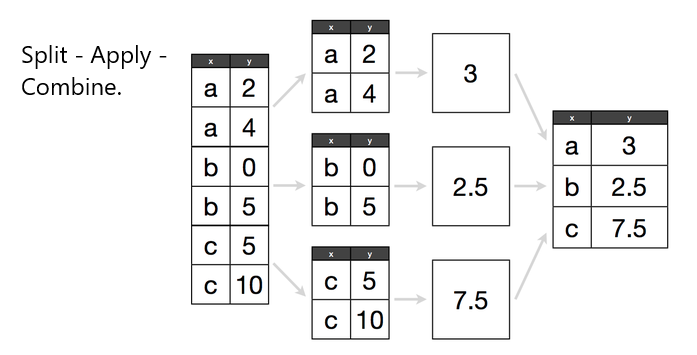

In [105]:
from IPython.core.display import Image
Image('c:/Users/jpsabini/Pictures/Split_Apply_Combine.png',width=400,height=400,embed=True)

In [106]:
#simple example
dfA = pd.DataFrame({'key1': ['z', 'z', 'b', 'z', 'd', 'b', 'b'],
                    'indx': range(7),
                    'Prog': ['AAP','Eng','Eng','Math','Fin','Lit','AAP']
                    })

dfA
#dfB=pd.DataFrame({'key2': ['a', 'b', 'b', 'c', 'd', 'e', 'a'],
#                    'indx': range(7),
#                     'Book': ['POP','Eng1','Eng1','Math_l','Fin_1','Lit_Amer','POP']
#                    })
#dfB

,Prog,indx,key1
0,AAP,0,z
1,Eng,1,z
2,Eng,2,b
3,Math,3,z
4,Fin,4,d
5,Lit,5,b
6,AAP,6,b


In [107]:
progs=dfA.groupby(by='key1')

In [108]:
progs # this is good! It is a group object not a data frame

### The structure of a group object has keys built upon the grouped columns and the associated data is a complex array. Thus the group object is analogous to a dictionary.




In [109]:
progs.groups #dict like

{'b': Int64Index([2, 5, 6], dtype='int64'),
 'd': Int64Index([4], dtype='int64'),
 'z': Int64Index([0, 1, 3], dtype='int64')}

In [110]:
# get the group
progs.get_group('z')



,Prog,indx,key1
0,AAP,0,z
1,Eng,1,z
3,Math,3,z


In [111]:
progs.sum() # works for all aggregate numerical methods, like sum,mean,std,cov, median

,indx
key1,
b,13
d,4
z,4


In [112]:
Oz=pd.concat([df1,df2],ignore_index=True)
Oz

,Ozone,Wind,Month,Day,Sensor
0,36.0,8.00,5,2,1
1,12.0,12.60,5,3,2
2,18.0,11.50,5,4,3
3,NaN,14.30,5,5,4
4,28.0,14.90,5,6,5
5,54.0,9.60,5,2,1
6,18.0,15.12,5,3,2
7,27.0,13.80,5,4,3
8,32.7,17.16,5,5,4
9,42.0,17.88,5,6,5


In [113]:
sensor1=Oz.groupby(by='Sensor')

In [114]:
sensor1.groups

{1: Int64Index([0, 5], dtype='int64'),
 2: Int64Index([1, 6], dtype='int64'),
 3: Int64Index([2, 7], dtype='int64'),
 4: Int64Index([3, 8], dtype='int64'),
 5: Int64Index([4, 9], dtype='int64')}

In [115]:
sensor1.get_group(5)

,Ozone,Wind,Month,Day,Sensor
4,28.0,14.90,5,6,5
9,42.0,17.88,5,6,5


In [116]:
sensor1[['Ozone','Wind']].agg(['mean','std'])

Ozone              Wind          
        mean        std   mean       std
Sensor                                  
1       45.0  12.727922   8.80  1.131371
2       15.0   4.242641  13.86  1.781909
3       22.5   6.363961  12.65  1.626346
4       32.7        NaN  15.73  2.022325
5       35.0   9.899495  16.39  2.107178

Sensor
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

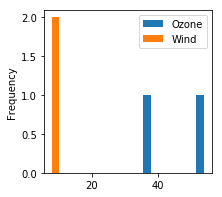

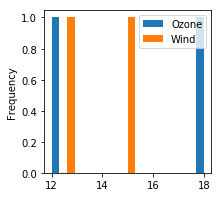

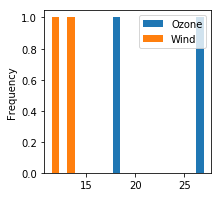

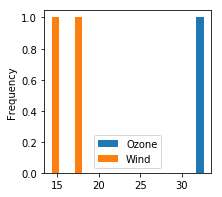

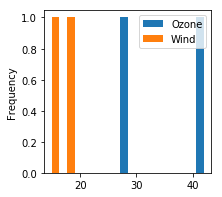

In [119]:
%matplotlib inline
sensor1[['Ozone','Wind']].plot(kind="hist",bins=20,layout=(3,2),figsize=(3,3))

In [120]:
Oz.describe(percentiles=np.arange(.1,1,.1))
# we created a decimal percentile . Let's see if we can determine which 
# sensors are recording above a 33 and what percentile are those values that in.

,Ozone,Wind,Month,Day,Sensor
count,9.000000,10.000000,10.0,10.000000,10.000000
mean,29.744444,13.486000,5.0,4.000000,3.000000
std,13.170527,3.129829,0.0,1.490712,1.490712
min,12.000000,8.000000,5.0,2.000000,1.000000
10%,16.800000,9.440000,5.0,2.000000,1.000000
20%,18.000000,11.120000,5.0,2.800000,1.800000
30.0%,21.600000,12.270000,5.0,3.000000,2.000000
40%,27.200000,13.320000,5.0,3.600000,2.600000
50%,28.000000,14.050000,5.0,4.000000,3.000000
60%,31.760000,14.540000,5.0,4.400000,3.400000


In [121]:
# we take the 70%th percentile for all cols and save it to v
v=Oz.describe(percentiles=np.arange(.1,1,.1)).loc['70%']
v # the above row of 70th percentile shows us Sensor 4 and poss 5 will have measurements 
  # for Ozone levels above 33 

Ozone     34.680
Wind      14.966
Month      5.000
Day        5.000
Sensor     4.000
Name: 70%, dtype: float64

In [122]:
Oz.loc[Oz.loc[:,'Sensor']>=4,['Ozone','Wind']].agg([np.mean,np.median])

,Ozone,Wind
mean,34.233333,16.06
median,32.700000,16.03


In [ ]:
# unpack the above because there may be something like this in your future :)

### Renaming Axis Indexes Optional easy stuff.

In [ ]:
data111 = pd.DataFrame(np.arange(12).reshape((3, 4)),
                    index=['Ohio', 'Colorado', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data111

In [ ]:
transform = lambda x: x[:4].upper()
data111.index.map(transform)

In [ ]:
data111.index = data111.index.map(transform)
data111

In [ ]:
data111.rename(index=str.title, columns=str.upper)

In [ ]:
data111.rename(index={'OHIO': 'INDIANA'},
            columns={'three': 'peekaboo'})


In [ ]:
data111.rename(index={'OHIO': 'INDIANA'}, inplace=True)
data111

# Here begins the fun Stats and Analysis
#### You should review at this point all of the pandas stats including covariance and std,mean,median,count,value_counts which give you a frequency count. 

In [123]:
# REMEMBER THIS when you get an output from an operation on a frame, 
# look at the resulting type. If it is a df, then you can use methods 
# on itlike a df. So describe() for example.
oz_df.describe(percentiles=[.125,.25, .5, .75,.90])
#stats there are more methods in stats look them up. std(), Cov(),Corr()
oz_df.describe(percentiles=[.125,.25, .5, .75,.90]).loc['90%']

Ozone       87.0
Solar.R    288.5
Wind        14.9
Temp        90.0
Month        9.0
Day         28.0
Name: 90%, dtype: float64

## Discretization and Binning
Binning is a statistical technique within the remit of descriptive stats.
Basically it is a series of buckets that hold descretized events. The size of the bucets have to be logically meaningfull and consistent. 
THe most common bin is of equally sized buckets - equally sized on the x axis. The resulting rectangles are the frequency of the items within that bucket. The buckets need not extend to all of the data, you can chop off things like we do below. The most common binning is the one where we choose a in number and the software usually creates bins on the basis of |max_value-min_value|/ number of data points in the category . Another can be sqrt(amount of data in the category)

The other method is to bucket by qantiles. How many items fall into a bucket that is statistically determined to be the median which is the 50% interval od the data...or the median of the top half which is the 75 percentile or the median of the lower half which is the 25% persentile or the median of the median of the lower half which is the 12.25 percentile. In other words we can cut or shape the intervls for the buckets along percentiles.Remember that the median point x means that 50% of the sample is below x or that the Ordered_count(s<x)for all s in the sample / all sample is .5. It is the prb that s<x.


The cut

In [124]:

ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
bins = [18, 25, 35, 60, 100]

cats = pd.cut(ages, bins)

cats
# This is the beginning of a frequenscy plot
#Open intervals on left means 18< x <=25 

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [125]:
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [126]:
ages

[20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [127]:
cats.categories

pd.value_counts(cats) #<- this is a histogram with
#                       bins that are determined by our bins variable

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

In [128]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
bins = [18, 25, 35, 60, 100]

pd.cut(ages, [18, 26, 36, 61, 100], right=False)


group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']

pd.cut(ages, bins, labels=group_names)

#data = np.random.rand(20)
#data=ages
#pd.cut(data, 4, precision=2)

[Youth, Youth, Youth, YoungAdult, Youth, ..., YoungAdult, Senior, MiddleAged, MiddleAged, YoungAdult]
Length: 12
Categories (4, object): [Youth < YoungAdult < MiddleAged < Senior]

In [ ]:
# WE can study this next time. But qcuts are based on quantiles. Here we
# have 4 so the first 
#data = np.random.randn(1000)  # Normally distributed

data=ages
qcats = pd.qcut(data, 4)  # Cut into quartiles


qcats.value_counts()

#(19.999, 22.75]    3 first quartile
#(22.75, 29.0]      3 second 
#(29.0, 38.0]       3 third 
#(38.0, 61.0]       3 fourth
# binshere arenot of equal size. The freq =area .
22.75-19.999
22.75- 29.0
29.0-38.0

### Covariance - measuring the Variance between two variables
 
 $\\Var(X)=E(X^2)−E(X)^2$
Mathematically squaring something and multiplying something by itself are the same. Because of this we can rewrite our Variance equation as:$\\E(XX)−E(X)$
This version of the Variance equation would have been much messier to illustrate even though it means the same thing. But now we can ask the question "What if one of the Xs where another Random Variable?", so that we would have:  $\\E(XY)−E(X)E(Y)$

And that, simpler than any drawing could express, is the definition of Covariance (Cov(X,Y)). If Variance is a measure of how a Random Variable varies with itself then Covariance is the measure of how one variable varies with another.

Correlation is the normalized version of covariance.
oz_df.corr()and oz_df.cov()


In [129]:
oz_df[['Ozone','Solar.R','Wind','Temp']].corr()

,Ozone,Solar.R,Wind,Temp
Ozone,1.000000,0.348342,-0.601547,0.698360
Solar.R,0.348342,1.000000,-0.056792,0.275840
Wind,-0.601547,-0.056792,1.000000,-0.449367
Temp,0.698360,0.275840,-0.449367,1.000000


# plotting 

#### I was trying to show how to colorize bars. 

(array([ 0.0813,  0.0407,  0.0407,  0.    ,  0.0203,  0.0203,  0.0203,
         0.    ,  0.    ,  0.0203]),
 array([ 20. ,  24.1,  28.2,  32.3,  36.4,  40.5,  44.6,  48.7,  52.8,
         56.9,  61. ]),
 <a list of 10 Patch objects>)

C:\Users\jpsabini\Anaconda3\lib\site-packages\matplotlib\figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


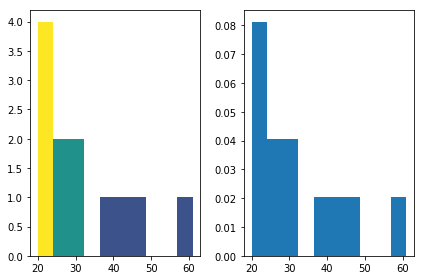

In [130]:
import matplotlib.colors as colors
%matplotlib inline

fig, axs = plt.subplots(1, 2, tight_layout=True) 
n_bins=10
#N is the count in each bin, bins is the lower-limit of the bin

N, bins, patches = axs[0].hist(ages, bins=n_bins)
#We'll color code by height, but you could use any scalar

fracs = N / N.max()
#we need to normalize the data to 0..1 for the full range of the colormap

norm = colors.Normalize(fracs.min(), fracs.max())
#Now, we'll loop through our objects and set the color of each accordingly

for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac)) 
    thispatch.set_facecolor(color)
#We can also normalize our inputs by the total number of counts

axs[1].hist(ages, bins=n_bins, density=True)
#Now we format the y-axis to display percentage

#axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=1)) plt.hist(ages) plt.show()


In [ ]:
oz_df.plot(kind="hist",bins=40,subplots=True,layout=(2,3),figsize=(10,10))